In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Loading dataset

In [2]:
startups = pd.read_csv("50_startups.csv")

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### We can just peek into few data points by using head function of pandas. By default, head function return top 5 values

## Data insights

In [4]:
startups.shape

(50, 5)

In [5]:
startups.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

## Observations :-
The dataset contains data about 50 startups. It has 5 columns: “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Profit”.
The first 3 columns indicate how much each startup spends on Research and Development, how much they spend on Marketing, and how much they spend on Administration cost.
The state column indicates which state the startup is based in and the last column states the profit made by the startup.

In [6]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Observations :-
We can see that R&D spend, Administration, Marketing Spend and Profit consists of floating point data type values and State has object type values.
We can also see that all 21 observations are non null and hence we don't have any missing values

In [7]:
startups[startups.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


## We don't have any duplicate values in our dataset. If duplicates values would have been present we would have to delete it.

## Summary statistics

In [9]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Observations :-
The mean value and the median value (50% percentile) are not having much difference between them for all the columns.
There is not a big difference in the 75% value and max value for all the columns except Marketing Spend column. For Marketing Spend, the 75% value is at 299469 but max value is 471784 (almost double)
From observations 1 and 2, it looks like there is no outlier for R&D Spend, Administration and Profit. However, we can say there is a chance of outlier in Marketing Spend column. But we will be confirming that below with some other techniques (boxplot) as well.


## Understanding the target variable¶

#### We have to make a prediction model to predict the Profit of startups. So in this case our target variable is Profit

In [10]:
startups['Profit'].unique()

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

## Observations :-
The Profit variable here is a continuous variable and is numerical data

In [11]:
startups['Profit'].value_counts()

118474.03    1
69758.98     1
81229.06     1
101004.64    1
124266.90    1
49490.75     1
192261.83    1
71498.49     1
156991.12    1
108733.99    1
78239.91     1
64926.08     1
144259.40    1
108552.04    1
97427.84     1
126992.93    1
105733.54    1
96712.80     1
96479.51     1
134307.35    1
99937.59     1
90708.19     1
182901.99    1
110352.25    1
42559.73     1
146121.95    1
89949.14     1
152211.77    1
35673.41     1
156122.51    1
166187.94    1
65200.33     1
149759.96    1
155752.60    1
191792.06    1
125370.37    1
107404.34    1
14681.40     1
111313.02    1
81005.76     1
105008.31    1
103282.38    1
132602.65    1
129917.04    1
122776.86    1
96778.92     1
77798.83     1
141585.52    1
191050.39    1
97483.56     1
Name: Profit, dtype: int64

## Observations :-
We could see that all the observations have only 1 count which means they are unique. There are no duplicates in our data

In [12]:
startups['Profit'].value_counts()

118474.03    1
69758.98     1
81229.06     1
101004.64    1
124266.90    1
49490.75     1
192261.83    1
71498.49     1
156991.12    1
108733.99    1
78239.91     1
64926.08     1
144259.40    1
108552.04    1
97427.84     1
126992.93    1
105733.54    1
96712.80     1
96479.51     1
134307.35    1
99937.59     1
90708.19     1
182901.99    1
110352.25    1
42559.73     1
146121.95    1
89949.14     1
152211.77    1
35673.41     1
156122.51    1
166187.94    1
65200.33     1
149759.96    1
155752.60    1
191792.06    1
125370.37    1
107404.34    1
14681.40     1
111313.02    1
81005.76     1
105008.31    1
103282.38    1
132602.65    1
129917.04    1
122776.86    1
96778.92     1
77798.83     1
141585.52    1
191050.39    1
97483.56     1
Name: Profit, dtype: int64

## Observations :-
We could see that all the observations have only 1 count which means they are unique. There are no duplicates in our data

## Data visualization
Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend'>

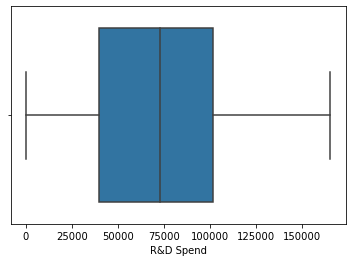

In [13]:
sn.boxplot(startups['R&D Spend'])

## Observations :-
There are no outliers in the R & D spend column.
The median line is at the centre of the box which means there is no skewness in the data.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration'>

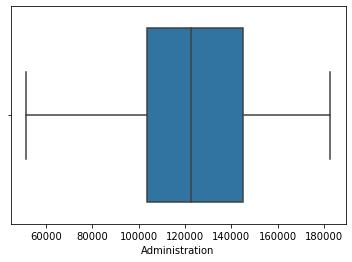

In [14]:
sn.boxplot(startups['Administration'])

## Observations :-
There are no outliers in the Administration column.
The median line is not at the centre of the box which means there is skewness in the data.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketing Spend'>

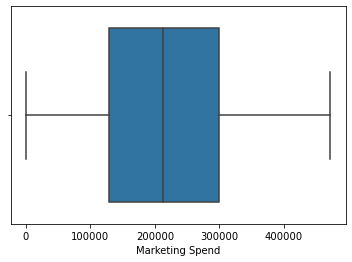

In [15]:
sn.boxplot(startups['Marketing Spend'])

### Observations :-
There are no outliers in the Marketing Spend column.
The median line is at the centre of the box which means there is no skewness in the data.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

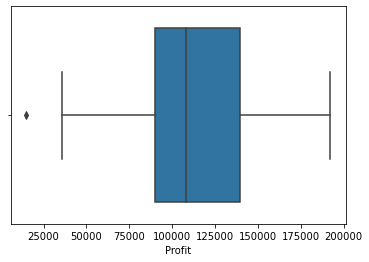

In [16]:
sn.boxplot(startups['Profit'])

## Observations :-
There is an outliers in the Profit column. The value is less than 25,000 which means the company made once very less profit.
The median line is towars the upper portion of the box which means there is positive skewness in the data.

## Dist plots
Dist plots are used to check the distribution of the data, peak value(the observation having the highest frequecy) and check for skewness in the data

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R&D Spend', ylabel='Density'>

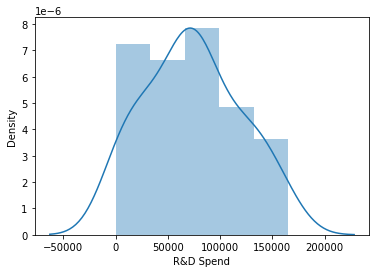

In [17]:
sn.distplot(startups['R&D Spend'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Administration', ylabel='Density'>

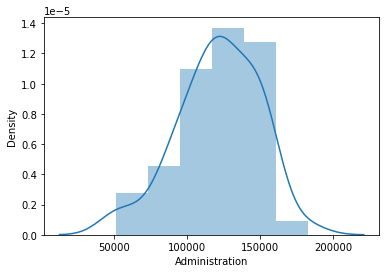

In [18]:
sn.distplot(startups['Administration'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Marketing Spend', ylabel='Density'>

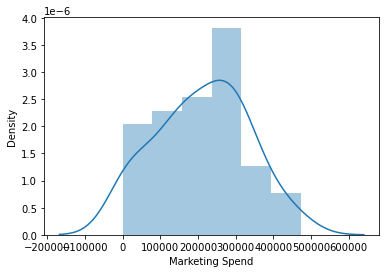

In [19]:
sn.distplot(startups['Marketing Spend'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

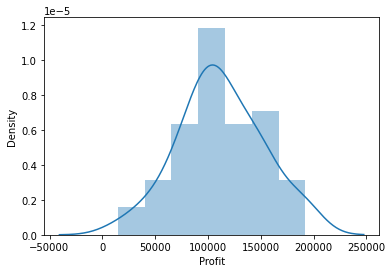

In [20]:
sn.distplot(startups['Profit'])

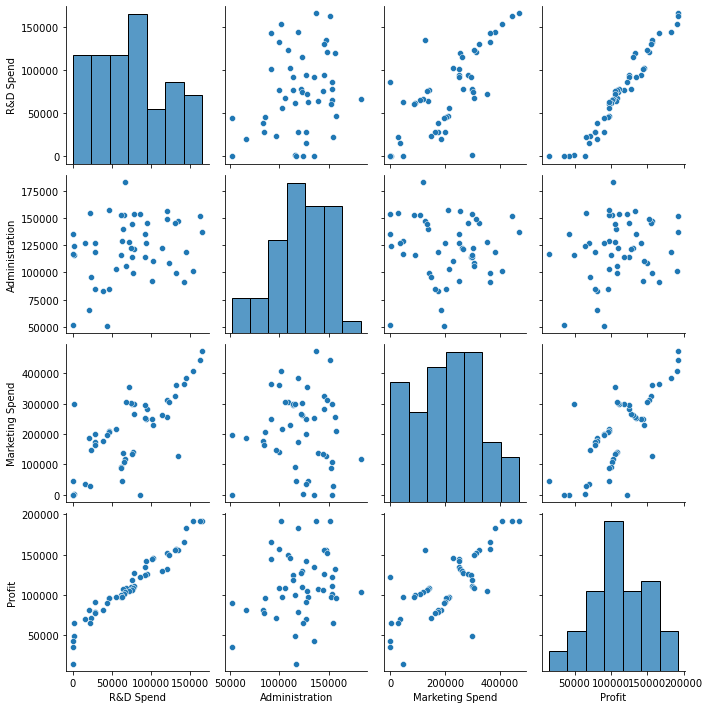

In [21]:
sn.pairplot(startups)

## Observations :-
There is an increase in Profit with increase in R & D spend. It means there is a positive correlation between them.
There exist a positive correlation between R & D spend and Marketing Spend as well.
It is difficult to determine correlation (increase/decrease) for other features. We will use heatmap and correlation function to determine it.

 ## Heatmap
Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

<AxesSubplot:>

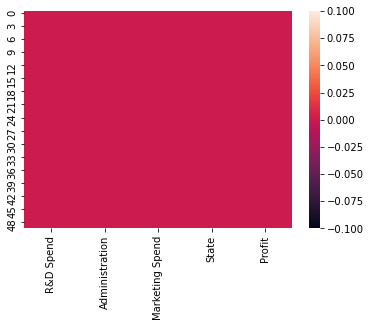

In [22]:
sn.heatmap(startups.isnull())

## Obervations :-
We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background.
We can check missing values by using isna() method as well.

In [23]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


## Correlation
The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

Correlation only works on the continuous variables and we have State variable which is a categorical variable. We need to convert the State variable into numerical values using Encoding techniques.

In [24]:
startups['State'].describe()

count           50
unique           3
top       New York
freq            17
Name: State, dtype: object

#### We have total 50 states count and only 3 unique states so we can go for One Hot Encoding technique. If we had more number of unique states count then we would have used another Encoding Technique called as Label Encoding.

In [25]:
startups = pd.get_dummies(startups, columns=['State'])
startups.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


#### Now we can see that there are 3 more columns added for State

<AxesSubplot:>

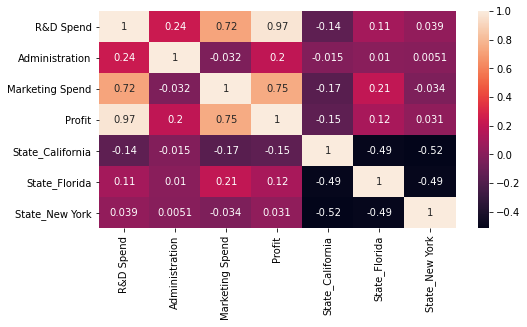

In [26]:
plt.figure(figsize=(8,4))
sn.heatmap(startups.corr(),annot = True)

## Finding correlation

In [27]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


 ## Observations :-
There exist a positive correlation between R&D spend and Marketing Spend with value 0.7.
There is a very high positive correlation with a value of 0.972 between Profit and R&D Spend as well.
The correlation value for Administration and R&D Spend is 0.24 so we can say there is very low correlation between them.
The correlation value for Administration and Marketing Spend is -0.03 so we can say there is negative correlation between them but it very low.
The correlation values between the states California, Florida and New York and Profit is very less (almost 0)

In [28]:
startups.rename(columns={'Marketing Spend':'Marketing'},inplace=True)

In [29]:
startups.rename(columns={'R&D Spend':'RD'},inplace=True)

In [30]:
startups.rename(columns={'State_New York':'State_NewYork'},inplace=True)

In [31]:
startups.head()

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


#### We need to standardize our data as we have used One Hot encoding technique and changed State variable. The scale is very different for States and the other variables so we will use Standard Scaler technique for standardizing the other variables

In [32]:
std = StandardScaler()
startup_std = std.fit_transform(startups)
startup_std = pd.DataFrame(startup_std, columns = startups.columns)

In [33]:
startup_std.head()

,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


### Fitting a linear regression model

In [34]:
model = smf.ols('Profit~RD+Administration+Marketing+State_California+State_Florida+State_NewYork',data=startup_std).fit()

In [35]:
model.params

Intercept          -5.204170e-16
RD                  9.179307e-01
Administration     -1.877136e-02
Marketing           8.185781e-02
State_California   -6.031706e-04
State_Florida       1.730042e-03
State_NewYork      -1.100457e-03
dtype: float64

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           1.34e-27
Time:                        13:04:28   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RD                   0.9179      0.053     17.369      0.000       0.811       1.024
Administration      -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing            0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
State_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
State_NewYork       -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## If we observe the p values in above table, we can see that the p values are more than 0.05 for Administration, Marketing, State_California, State_Florida and State_NewYork as well.¶
We need to check how these variables individually affect Profit value. So we will build a Simple Linear Regression model for each variable and check the p values

### Simple Linear Regression between Profit and Administration

In [38]:
model_ad = smf.ols('Profit~Administration',data=startup_std).fit()

In [39]:
model_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 29 Jun 2021   Prob (F-statistic):              0.162
Time:                        13:06:08   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.141  -3.68e-15      1.000      -0.284       0.284
Administration     0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p value is 0.162 which is greater than 0.05 and we also saw correlation value between Profit and Administration is very less which is 0.2.¶
We can say that the Administration variable is not important in predicting the Profit values 

## Simple Linear Regression between Profit and Marketing Spend

In [41]:
model_mkt = smf.ols('Profit~Marketing',data=startup_std).fit()

In [42]:
model_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           4.38e-10
Time:                        13:08:26   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.096  -5.43e-15      1.000      -0.193       0.193
Marketing      0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We could see that the p-value for Marketing Spend is 0 which is less than 0.05 and also the correlation value between Profit and Marketing Spend is 0.75 so the Profit is actually dependent on Marketing Spend.
But when we used Marketing Spend to fit the model the p -value came as 0.123 (greater than 0.05). This means that Marketing Spend individually is affecting the Profit but when it is used by other features it is not. So we can say there is a multicollinearity problem and we will use VIF futher to check it.

## Simple Linear Regression between Profit and R&D Spend

In [43]:
model_rd = smf.ols('Profit~RD',data=startup_std).fit()

In [44]:
model_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           3.50e-32
Time:                        13:10:06   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RD             0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We could see that the p-value for R&D Spend is 0 which is less than 0.05 and also the correlation value between Profit and R&D Spend is 0.97 so the Profit is actually dependent on R&D Spend.

### Simple Linear Regression between Profit and State_California¶

In [45]:
model_sc = smf.ols('Profit~State_California',data=startup_std).fit()

In [46]:
model_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Tue, 29 Jun 2021   Prob (F-statistic):              0.312
Time:                        13:11:43   Log-Likelihood:                -70.409
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.204e-16      0.143  -3.64e-15      1.000      -0.287       0.287
State_California    -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We could see that the p-value for State_California is 0.312 which is more than 0.05 and also the correlation value between Profit and State_California is -0.15 so the Profit is actually not dependent on State_California variable.¶

### Simple Linear Regression between Profit and State_Florida

In [47]:
model_sf = smf.ols('Profit~State_Florida',data=startup_std).fit()

In [48]:
model_sf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Tue, 29 Jun 2021   Prob (F-statistic):              0.421
Time:                        13:14:34   Log-Likelihood:                -70.607
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.204e-16      0.143  -3.63e-15      1.000      -0.288       0.288
State_Florida     0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We could see that the p-value for State_Florida is 0.421 which is more than 0.05 and also the correlation value between Profit and State_Florida is 0.12 so the Profit is actually not dependent on State_Florida variable.¶

### Simple Linear Regression between Profit and State_NewYork

In [49]:
model_sny = smf.ols('Profit~State_NewYork',data=startup_std).fit()

In [50]:
model_sny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Tue, 29 Jun 2021   Prob (F-statistic):              0.829
Time:                        13:16:22   Log-Likelihood:                -70.922
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.204e-16      0.144  -3.61e-15      1.000      -0.290       0.290
State_NewYork     0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We could see that the p-value for State_NewYork is 0.829 which is more than 0.05 and also the correlation value between Profit and State_NewYork is 0.031 so the Profit is actually not dependent on State_NewYork variable.¶

## Calculating VIF as well to check collinearity

In [51]:
rsq_rd = smf.ols('RD~Administration+Marketing+State_California+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_ad = smf.ols('Administration~RD+Marketing+State_California+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_ad = 1/(1-rsq_ad)

rsq_mkt = smf.ols('Marketing~RD+Administration+State_California+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_mkt = 1/(1-rsq_mkt) 

rsq_sc = smf.ols('State_California~RD+Administration+Marketing+State_Florida+State_NewYork',data=startup_std).fit().rsquared  
vif_sc = 1/(1-rsq_sc)

rsq_sf = smf.ols('State_Florida~RD+Administration+Marketing+State_California+State_NewYork',data=startup_std).fit().rsquared  
vif_sf = 1/(1-rsq_sf)

rsq_sny = smf.ols('State_NewYork~RD+Administration+Marketing+State_California+State_Florida',data=startup_std).fit().rsquared  
vif_sny = 1/(1-rsq_sny)


# Storing vif values in a data frame
d1 = {'Features':['RD','Administration','Marketing','State_California','State_Florida','State_NewYork'],'VIF':[vif_rd,vif_ad,vif_mkt,vif_sc,vif_sf,vif_sny]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

<ipython-input-51-011a72095acd>:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sc = 1/(1-rsq_sc)
<ipython-input-51-011a72095acd>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sf = 1/(1-rsq_sf)
<ipython-input-51-011a72095acd>:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sny = 1/(1-rsq_sny)


,Features,VIF
0,RD,2.495511
1,Administration,1.177766
2,Marketing,2.416797
3,State_California,inf
4,State_Florida,inf
5,State_NewYork,inf


#### Here, VIF value is infinite for the State variables, so we can confirm collinearlity does not exist between them
From the above Simple Regression models and VIF values we can say that the States and Administration are not significant variaables for predicting the Profit values.¶
We will build a model using R&D Spend and Marketing Spend

### Simple Linear Regression between Profit and R&D Spend, Marketing Spend

In [52]:
model_rd_m = smf.ols('Profit~RD+Marketing',data=startup_std).fit()

In [53]:
model_rd_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           2.16e-31
Time:                        13:19:11   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.032   -1.6e-14      1.000      -0.065       0.065
RD             0.9072      0.047     19.266      0.000       0.812       1.002
Marketing      0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
(model_mkt.rsquared,model_mkt.aic)

(0.5591535746115515, 104.94091802371327)

In [55]:
(model_rd.rsquared,model_rd.aic)

(0.9465353160804392, -0.5428445147422991)

### On comparing the R squared and AIC values for Marketing and R & D Spend, we can see that R square value is more and AIC value is less for R&D Spend . So R & D Spend variable is enough to predict the Profit value¶

In [57]:

(model_rd.rsquared,model_rd.rsquared_adj)

(0.9465353160804392, 0.9454214684987816)

## Model validation using Residual analysis

#### Q-Q plot to check normality of errors

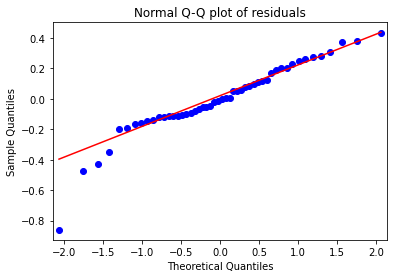

In [58]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_rd.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [59]:
list(np.where(model_rd.resid<-0.8))

[array([49], dtype=int64)]

#### We can see most of the points are very close and on the line in the above plot. Although, there is a data point (observation no.49) that is very far away from the straight line and we will try to remove the influencer point with the help of Cook's distance, Hat - point method later below.

### Residual Plot for Homoscedasticity

In [60]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

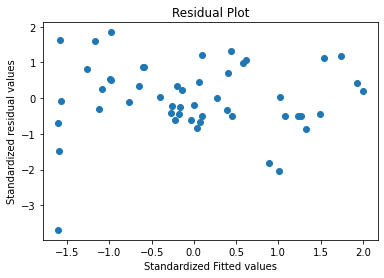

In [61]:
plt.scatter(get_standardized_values(model_rd.fittedvalues),
            get_standardized_values(model_rd.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#### There is no pattern in the Residual plot, so we can say there is a linear relation and no error variance

### Residuals vs Regressors

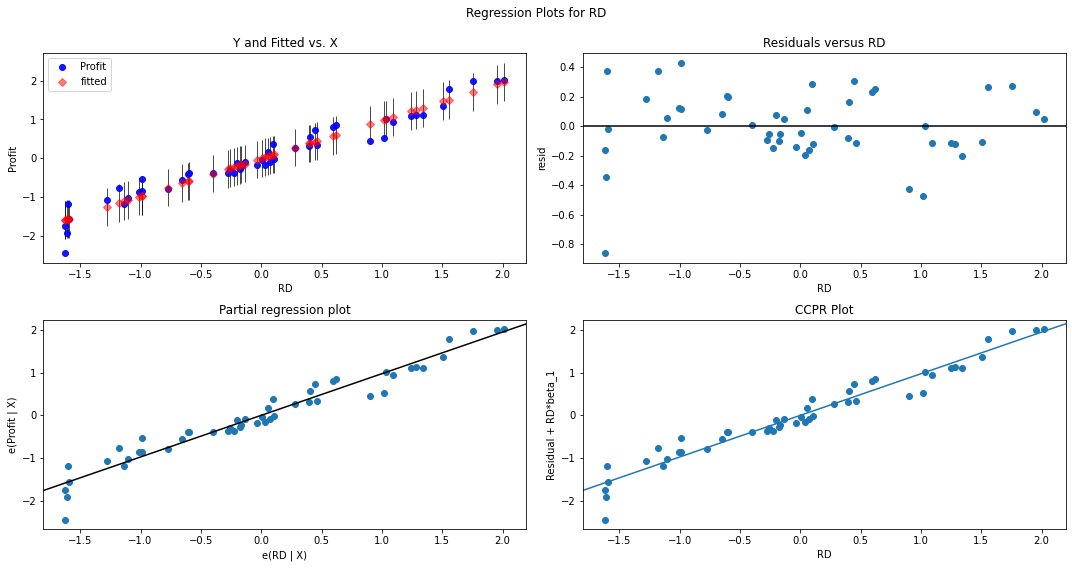

In [62]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_rd, "RD", fig=fig)
plt.show()

### Model Deletion Diagnostics
Detecting Influencers/Outliers using Cook's distance

In [63]:
model_influence = model_rd.get_influence()
(c, _) = model_influence.cooks_distance

### Plot the influencers values using stem plot

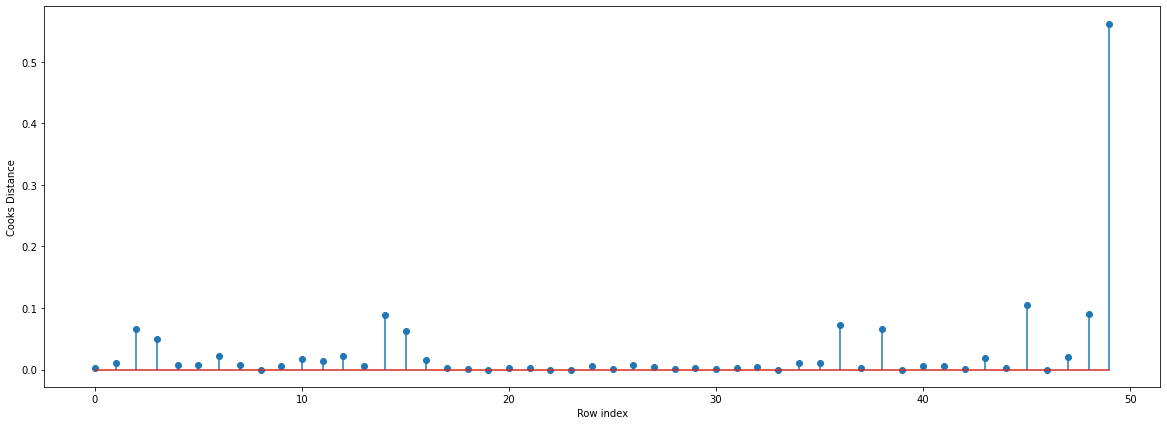

In [67]:
fig = plt.subplots(figsize=(20, 7)) 
plt.stem(np.arange(len(startup_std)), np.round(c, 3)) 
plt.xlabel('Row index') 
plt.ylabel('Cooks Distance')
plt.show()

In [68]:
(np.argmax(c),np.max(c))

(49, 0.562061025926428)

### We can see that the 49th observation is an Influencer point and has more distance than other data points. We will delete this data point to further increase our accuracy

### Improving the model

In [69]:
startup=startup_std.drop(startup_std.index[[49]],axis=0).reset_index()

In [70]:
startup.shape

(49, 8)

In [71]:
startup.head()

,index,RD,Administration,Marketing,Profit,State_California,State_Florida,State_NewYork
0,0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


## Build the model

In [72]:
final_model= smf.ols('Profit~RD',data = startup).fit()

In [73]:
(final_model.rsquared,final_model.rsquared_adj)

(0.9573395972488337, 0.9564319291051918)

### Predicting for new data¶

In [74]:
new_data=pd.DataFrame({'RD':100000},index=[1])

In [75]:
final_model.predict(new_data)

1    94277.81544
dtype: float64